In [ ]:
!pip install unstructured-client -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 21.5 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import userdata
UNSTRUCTURED_API_KEY = userdata.get('UNSTRUCTURED_API_KEY')
UNSTRUCTURED_API_URL = userdata.get('UNSTRUCTURED_API_URL')

In [ ]:
import os, json

import unstructured_client
from unstructured_client.models import operations, shared

client = unstructured_client.UnstructuredClient(
    api_key_auth=UNSTRUCTURED_API_KEY,
    server_url=UNSTRUCTURED_API_URL
)

In [ ]:
#filename = "/content/ilide.info-llm-roadmap-from-beginner-to-advanced-level-pr_61e138701626d09b2b3c4dcc31a61e8f-1-20.pdf"
filename = "/content/Mini_Project_Report[1] (1) (2).pdf"
req = operations.PartitionRequest(
    partition_parameters=shared.PartitionParameters(
        files=shared.Files(
            content=open(filename, "rb"),
            file_name=filename,
        ),
        strategy=shared.Strategy.HI_RES,
        languages=['eng'],
        split_pdf_page=True,            # If True, splits the PDF file into smaller chunks of pages.
        split_pdf_allow_failed=True,
        extract_image_block_types=["Image", "Table"] # If True, the partitioning continues even if some pages fail.  # Set the number of concurrent request to the maximum value: 15.
    ),
)

try:
    res = client.general.partition(request=req)
    element_dicts = [element for element in res.elements]

    # Print the processed data's first element only.
    print(element_dicts[0])

    # Write the processed data to a local file.
    json_elements = json.dumps(element_dicts, indent=2)

    with open("response", "w") as file:
        file.write(json_elements)
except Exception as e:
    print(e)


{'type': 'Image', 'element_id': '2b25a1fcfa02ce677fb256bb9838d303', 'text': 'j 2 / 5 e', 'metadata': {'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADtANUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+P

In [ ]:
res.elements[0].source

AttributeError: 'dict' object has no attribute 'source'

In [2]:
import json, base64, io
from PIL import Image
from IPython.display import display
def get_image_block_types(input_json_file_path: str):
    with open(input_json_file_path, 'r') as file:
        file_elements = json.load(file)

    for element in file_elements:
        if "image_base64" in element["metadata"]:
            print("=="*50)
            # Decode the Base64-encoded representation of the
            # processed "Image" or "Table" element into its original
            # visual representation, and then show it.
            image_data = base64.b64decode(element["metadata"]["image_base64"])
            image = Image.open(io.BytesIO(image_data))
            display(image)



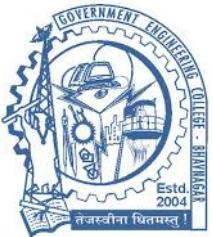

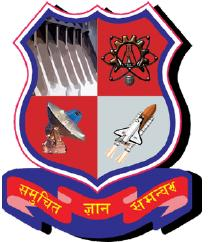

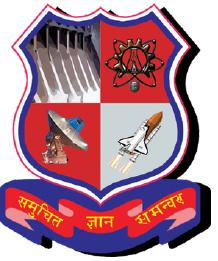

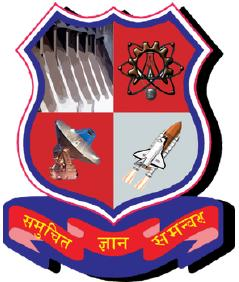

In [ ]:
get_image_block_types("/content/PATH_TO_OUTPUT_FILE")

In [62]:
element_dicts[0]

{'type': 'Image',
 'element_id': '2b25a1fcfa02ce677fb256bb9838d303',
 'text': 'j 2 / 5 e',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADtANUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8

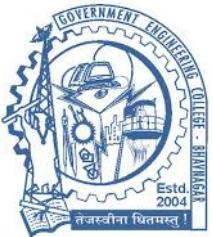

In [47]:
image_data = base64.b64decode(element_dicts[0]["metadata"]["image_base64"])
image = Image.open(io.BytesIO(image_data))
image